In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
os.getcwd()

'C:\\Users\\regis\\OneDrive\\Dokumente\\GitHub\\wake_effect\\delta_wind_velocity'

In [2]:
# load data - two data frames
wind_dir = pd.read_csv('C:/Users/regis/OneDrive/Dokumente/GitHub/wake_effect/data/Wind_direction.csv')
wind_v = pd.read_csv('C:/Users/regis/OneDrive/Dokumente/GitHub/wake_effect/data/Windfarm.csv')

In [3]:
# merge two dataframes
df = wind_dir.merge(wind_v, left_on='Unnamed: 0', right_on='Unnamed: 0')

In [4]:
# Drop columns with inconsistent wind_dir records
# Get mean wind direction per angle, between average of 80.0 and 100.0. Group wind_dir by steps of 10.
# Rename numerical titles
df1 = df.drop(columns = ['10.0'])
df1 = df1.drop(columns = ['40.0'])
df1 = df1.drop(columns = ['60.0'])
df1['wind_dir'] = ((df1['80.0'] + df1['100.0'])/2).round(0)
df1['80.0'] = df1['80.0'].round(0)
df1['100.0'] = df1['100.0'].round(0)
df1 = df1.rename(columns={'80.0': 'eighty', '100.0': 'hundred'})

In [24]:
# Group dataframe by wind direction, with the mean value for each row
df2 = df1.groupby(['wind_dir']).mean().round(2)
df2 = df2.drop(columns = ['eighty'])
df2 = df2.drop(columns = ['hundred'])
df2.head(10)

,WTG1,WTG2,WTG3,WTG4,WTG5,WTG6,WTG7,WTG8,WTG9,WTG10,...,WTG23,WTG24,WTG25,WTG26,WTG27,WTG28,WTG29,WTG30,WTG31,WTG32
wind_dir,,,,,,,,,,,,,,,,,,,,,
2.0,4.90,5.00,5.20,4.60,4.80,4.30,4.90,4.20,5.10,4.90,...,5.00,3.70,4.90,3.70,4.90,3.60,4.80,5.50,5.20,5.00
4.0,3.25,3.10,3.15,2.70,3.10,2.80,3.45,2.45,3.45,3.20,...,3.70,3.30,3.95,3.10,3.95,3.35,3.90,4.30,4.10,3.75
5.0,1.40,1.70,1.00,1.10,1.80,1.10,1.00,1.40,1.20,1.30,...,0.50,0.80,1.20,0.90,1.40,0.70,0.50,0.80,1.30,0.80
6.0,5.20,5.50,5.70,5.30,5.20,4.90,5.30,4.40,5.60,5.40,...,4.80,3.90,5.00,3.80,4.90,4.00,4.70,5.20,5.00,4.80
7.0,3.00,2.90,2.90,2.40,2.80,2.10,2.60,2.10,3.00,2.80,...,2.10,2.30,1.20,1.80,1.90,1.40,1.10,1.30,0.90,1.10
8.0,3.20,3.20,3.10,3.20,2.90,2.30,3.40,2.40,3.50,3.20,...,2.70,2.40,3.30,2.20,3.20,2.50,3.20,3.20,3.20,3.10
9.0,6.30,5.80,6.50,6.00,6.50,5.70,6.60,5.60,7.30,5.90,...,5.60,5.50,6.50,5.50,6.60,6.20,6.50,7.10,6.70,6.30
10.0,3.97,3.90,4.17,4.07,3.90,3.67,4.03,3.53,4.13,3.87,...,2.67,2.63,2.87,2.67,2.97,2.33,2.37,2.70,2.83,2.73
11.0,4.67,4.58,4.77,4.42,4.55,3.55,4.60,3.90,4.80,4.55,...,3.70,3.77,4.30,3.53,4.37,3.77,4.23,4.65,4.47,4.07


In [7]:
# big loop to fill matrix with array of calculated wind spped differences
## obsolete, but nice

# create matrix frame for delta wind speed
# each turbine has per angle a list of its wind difference to all turbines
col = ['wind_dir','WTG1','WTG2','WTG3','WTG4','WTG5','WTG6','WTG7','WTG8','WTG9','WTG10','WTG11','WTG12','WTG13','WTG14','WTG15','WTG16','WTG17','WTG18','WTG19','WTG20','WTG21','WTG22','WTG23','WTG24','WTG25','WTG26','WTG27','WTG28','WTG29','WTG30','WTG31','WTG32']
matrix = pd.DataFrame(columns=col)
matrix['wind_dir'] = range(0,361)
matrix = matrix.set_index('wind_dir')

matrix.head(3)


ma = matrix
count = 0

for i in df2:
    index = int(df2.iloc[[count]].index.values)
    for u in ma:
        y = []
        a = (df2[u].iloc[[count]]) #aimed turbine
        for n in ma:
            b = (df2[n].iloc[[count]]) #other turbines
            c = [(a - b).round(2)]
            y = y + c
        ma.at[index, u] = y
    count = count + 1

In [25]:
# Function: get absolute or relative wind speed difference
# Input: turbine nr, turbine nr, angle, relative change: 1 -> yes
# Output: [wind diff]

def wind_dif(turbine1, turbine2, angle, relative=0):
    if relative == 0:
        t1 = "WTG" + str(turbine1)
        t2 = "WTG" + str(turbine2)
        try:
            wind_dif = (df2[t1].loc[[angle]]) - (df2[t2].loc[[angle]])
            wind_dif = wind_dif.iloc[0].round(1)
            return wind_dif
        except:
            print("NaN")
    else:
        t1 = "WTG" + str(turbine1)
        t2 = "WTG" + str(turbine2)
        try:
            wind_dif = (df2[t1].loc[[angle]]) - (df2[t2].loc[[angle]])
            t1 = df2[t1].loc[[angle]]
            t1 = t1.iloc[0].round(1)
            wind_dif = wind_dif.iloc[0].round(1)
            wind_dif = wind_dif / (wind_dif + t1)
            return wind_dif
        except:
            print("NaN")

In [57]:
# Function create plot of absolute wind speed diff over all angle
# Input: Nr. of turbine, Nr. of turbine, relative change: 1 -> yes
# Output: plot

def wd_plot(turbine1, turbine2, relative=0):
    t1 = "WTG" + str(turbine1)
    t2 = "WTG" + str(turbine2)
    c = []
    count = 0
    for i in df2.iterrows():
        index = int(df2.iloc[[count]].index.values)
        number = wind_dif(turbine1, turbine2, index, relative)
        c = c + [[index] + [number]]
        count = count + 1    
    c = pd.DataFrame(c, columns=['wind_dir', 'wind_diff'])
    wind_dir = c['wind_dir']
    amount = c['wind_diff']
    fig = plt.figure()
    plt.bar(wind_dir, amount)
    fig.set_size_inches(12, 6)

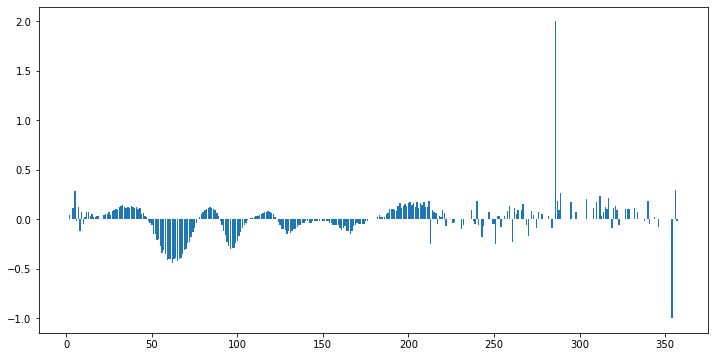

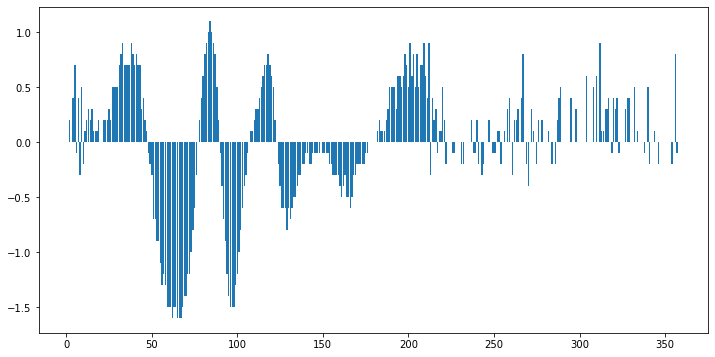

In [64]:

wd_plot(5,4,1)
wd_plot(5,4)



In [40]:
# Function create confusion matrix of wind speed diff by angle
# Input: angle
# Output: confusion matrix

def conf_ma(angle):
    col2 = ['turbines','WTG1','WTG2','WTG3','WTG4','WTG5','WTG6','WTG7','WTG8','WTG9','WTG10','WTG11','WTG12','WTG13','WTG14','WTG15','WTG16','WTG17','WTG18','WTG19','WTG20','WTG21','WTG22','WTG23','WTG24','WTG25','WTG26','WTG27','WTG28','WTG29','WTG30','WTG31','WTG32']
    row2 = ['WTG1','WTG2','WTG3','WTG4','WTG5','WTG6','WTG7','WTG8','WTG9','WTG10','WTG11','WTG12','WTG13','WTG14','WTG15','WTG16','WTG17','WTG18','WTG19','WTG20','WTG21','WTG22','WTG23','WTG24','WTG25','WTG26','WTG27','WTG28','WTG29','WTG30','WTG31','WTG32']
    ma_weights = pd.DataFrame(columns=col2)
    ma_weights['turbines'] = row2
    ma_weights = ma_weights.set_index('turbines')
    
    for i in ma_weights:
        turbine1 = i[3:]
        for n in ma_weights:
            turbine2 = n[3:]
            number = wind_dif(turbine1, turbine2, angle)
            if number == None:
                print("No entries for this angle")
                return 

            ma_weights[n].loc[[i]] = number
                
    return ma_weights

In [70]:
conf_ma(95)

,WTG1,WTG2,WTG3,WTG4,WTG5,WTG6,WTG7,WTG8,WTG9,WTG10,...,WTG23,WTG24,WTG25,WTG26,WTG27,WTG28,WTG29,WTG30,WTG31,WTG32
turbines,,,,,,,,,,,,,,,,,,,,,
WTG1,0,-0.2,0.1,0.7,2.1,0.7,0,0.6,-0.2,-0,...,-0.2,-0.3,0.2,-0.2,-0.1,-0.3,-0.2,-0.5,-0.2,1.5
WTG2,0.2,0,0.3,0.9,2.3,0.9,0.2,0.8,-0.1,0.2,...,-0,-0.2,0.4,0,0.1,-0.1,0,-0.3,-0.1,1.6
WTG3,-0.1,-0.3,0,0.6,2,0.6,-0.1,0.5,-0.3,-0.1,...,-0.3,-0.4,0.1,-0.2,-0.2,-0.3,-0.2,-0.6,-0.3,1.4
WTG4,-0.7,-0.9,-0.6,0,1.4,0,-0.7,-0.1,-0.9,-0.7,...,-0.9,-1,-0.5,-0.9,-0.8,-1,-0.9,-1.2,-0.9,0.8
WTG5,-2.1,-2.3,-2,-1.4,0,-1.4,-2.1,-1.5,-2.3,-2.1,...,-2.3,-2.4,-1.9,-2.3,-2.2,-2.4,-2.3,-2.6,-2.3,-0.6
WTG6,-0.7,-0.9,-0.6,-0,1.4,0,-0.7,-0.1,-1,-0.7,...,-0.9,-1,-0.5,-0.9,-0.8,-1,-0.9,-1.2,-1,0.8
WTG7,-0,-0.2,0.1,0.7,2.1,0.7,0,0.6,-0.2,-0,...,-0.2,-0.3,0.2,-0.2,-0.1,-0.3,-0.2,-0.5,-0.2,1.5
WTG8,-0.6,-0.8,-0.5,0.1,1.5,0.1,-0.6,0,-0.8,-0.6,...,-0.8,-0.9,-0.4,-0.8,-0.7,-0.9,-0.8,-1.1,-0.8,0.9
WTG9,0.2,0.1,0.3,0.9,2.3,1,0.2,0.8,0,0.2,...,0,-0.1,0.4,0.1,0.1,-0,0.1,-0.2,0,1.7
